# Exploring relationships between variables

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os 

In [3]:
# Import data

path = r'C:\Users\lydia\OneDrive\Documents\Career Foundry Data\Data Immersion\Acheivement 6'
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Tornado Data.csv'), index_col = False)

## Correlation

In [4]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'date', 'states', 'mag',
       'injuries', 'deaths', 'starting lat', 'starting lon', 'ending lat',
       'ending lon', 'length in miles', 'width in yards', 'wind speed',
       'potential damage'],
      dtype='object')

In [5]:
# Create a subset exlcuding variables not required
sub = df[['states', 'mag', 'injuries', 'deaths','starting lon', 'starting lat','length in miles', 'width in yards']]

In [6]:
sub

,states,mag,injuries,deaths,starting lon,starting lat,length in miles,width in yards
0,Illinois,3.0,3,0,-89.3000,39.1000,3.60,130
1,Missouri,3.0,3,0,-90.2200,38.7700,9.50,150
2,Ohio,1.0,1,0,-84.5800,40.8800,0.10,10
3,Arkansas,3.0,1,1,-94.3700,34.4000,0.60,17
4,Illinois,2.0,0,0,-87.3300,41.1700,0.10,100
...,...,...,...,...,...,...,...,...
67091,Georgia,1.0,0,0,-83.3804,31.1703,2.19,150
67092,Georgia,1.0,0,0,-82.7300,31.6900,11.71,300
67093,Alabama,1.0,0,0,-85.7878,34.2875,0.95,50
67094,Georgia,1.0,0,0,-84.9998,33.7372,2.75,150


C:\Users\lydia\AppData\Local\Temp\ipykernel_14904\380621639.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(sub.corr(), annot = True, ax = ax)


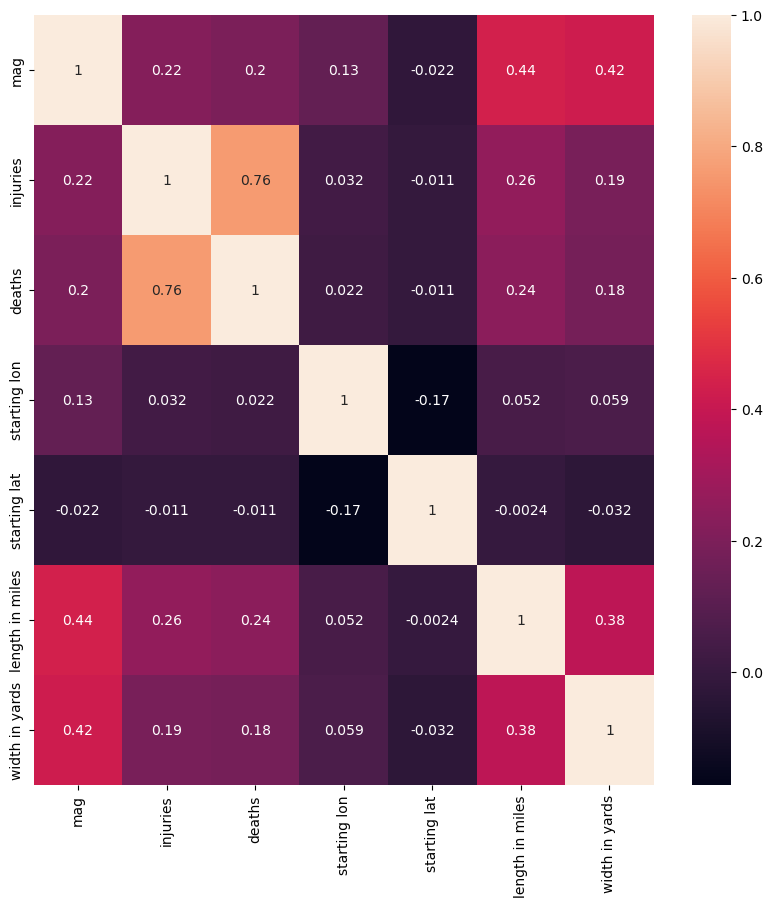

In [7]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

Variables were removed from the subgroup that aren't suitable for correlation analysis. 
The heatmap shows a few moderate correlations between the vairables. 
The strongest correlation occurs between the number of deaths caused by the tornado and the number of injuries. This makes sense given more destructive tornadoes are likely to lead to greater numbers of both deaths and injuries. Furthermore, moderate correlations occur between magnitude of the tornado and the widths and lengths. 


## Scatterplots

Scatterplots were created for the variables with the strongest correlations

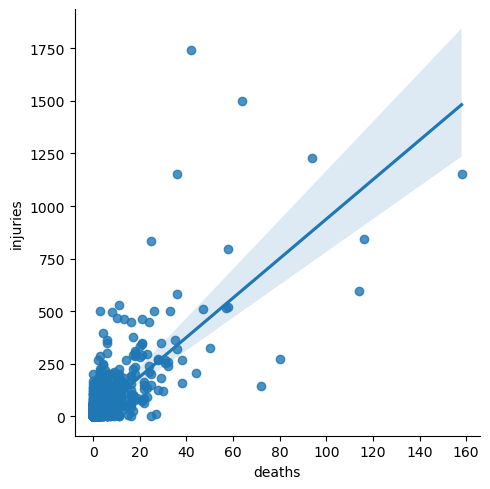

In [35]:
# Scatterplot of 'deaths' and 'injuries'

sns.lmplot(x = 'deaths', y = 'injuries', data = df)

The scatterplot indicates that there are actually lots of data points far away from the line and the scatterplot in fact shows quite a bit of variability. 
Lots of the data points are surrounded near the lower numbers - this suggests most tornadoes reported have a low number of deaths and injuries.

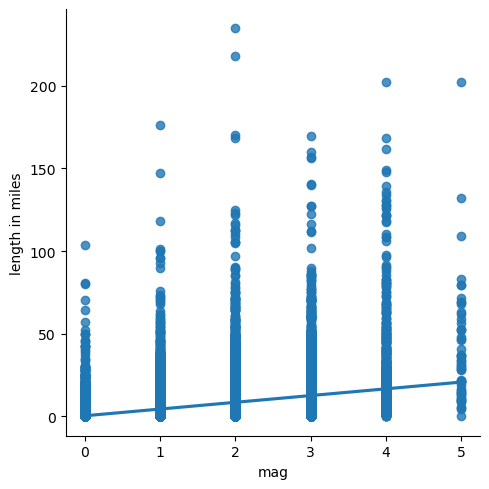

In [36]:
# Scatterplot of 'mag' and 'length in miles'

sns.lmplot(x = 'mag', y = 'length in miles', data = df)

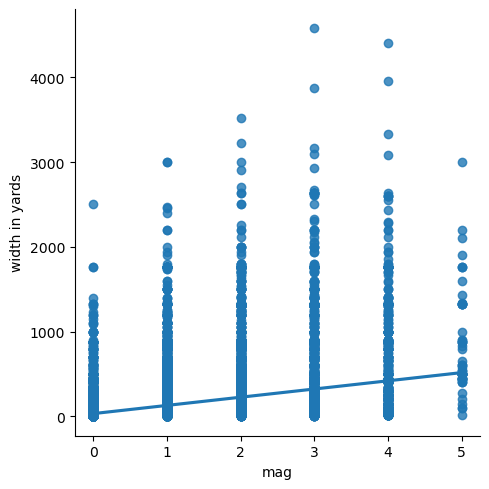

In [37]:
# Scatterplot of 'mag' and 'width in yards'

sns.lmplot(x = 'mag', y = 'width in yards', data = df)

In [38]:
df['mag'].value_counts()

0.0    31048
1.0    22783
2.0     9490
3.0     2530
4.0      581
5.0       59
Name: mag, dtype: int64

Categorcial plots may be more useful for assessing the relationship between megnitude and length/width given the categorical nature of a magnitude rating.

## Pair plots

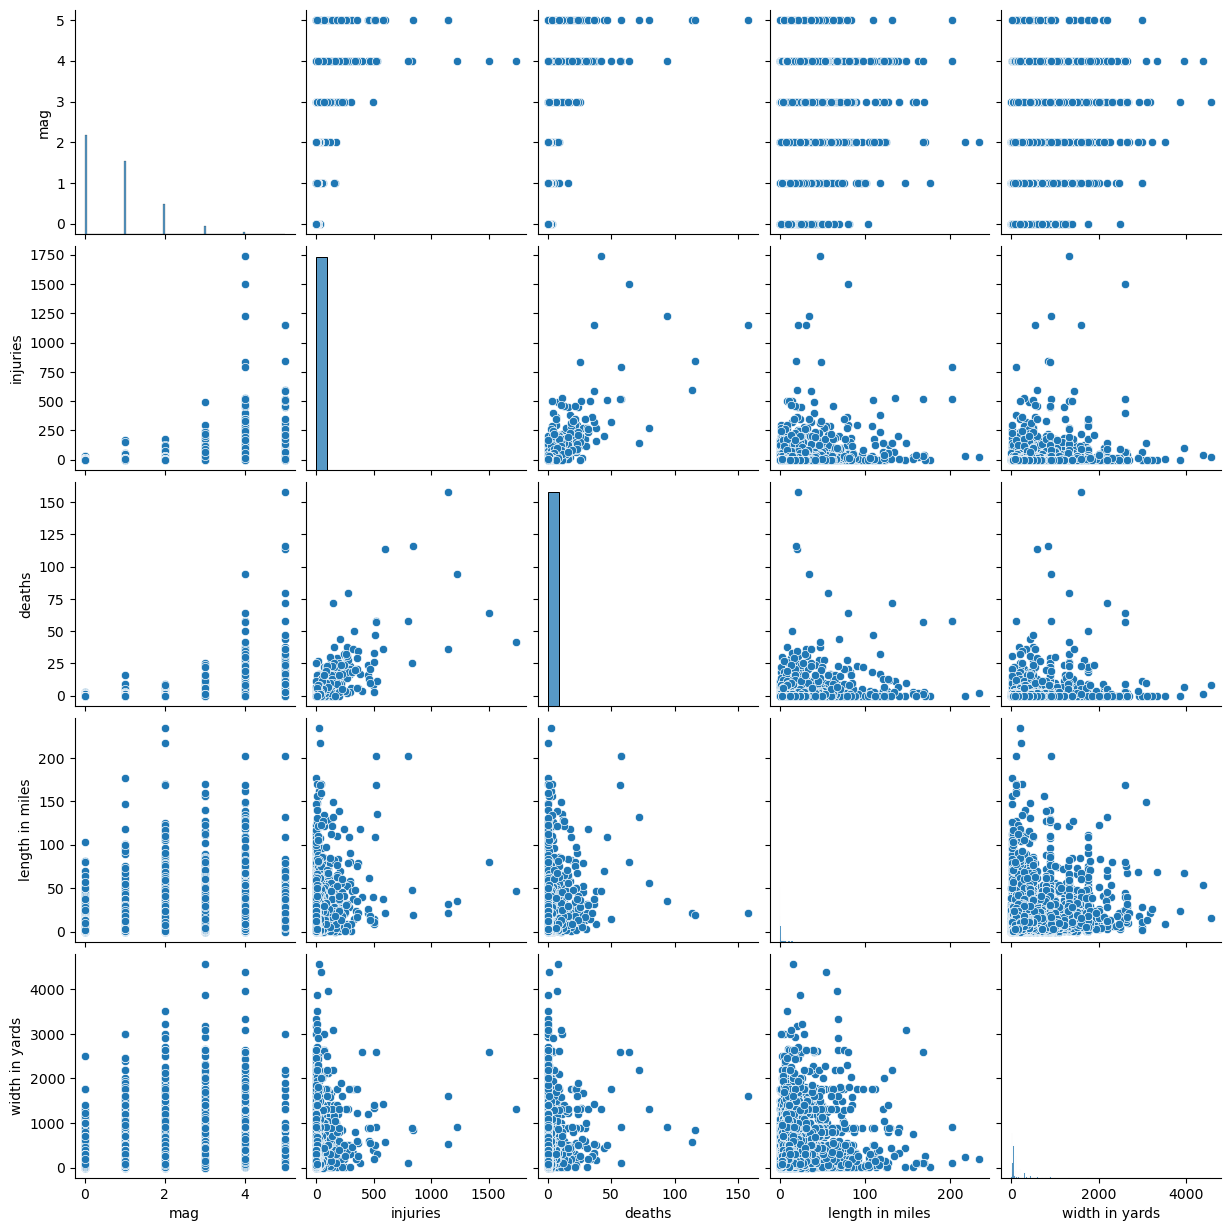

In [40]:
# Create a pairplot for the variables

g = sns.pairplot(sub)

From the pairplots, I want to explore the relationship further between the length and width of tornadoes and the number of injuries and deaths. 
Furthermore, the pairplots are indicating a relaitonship between the magnitude and the number of injuries and deaths which is understandable. 

## Categorical Plots

<Axes: xlabel='year', ylabel='Count'>

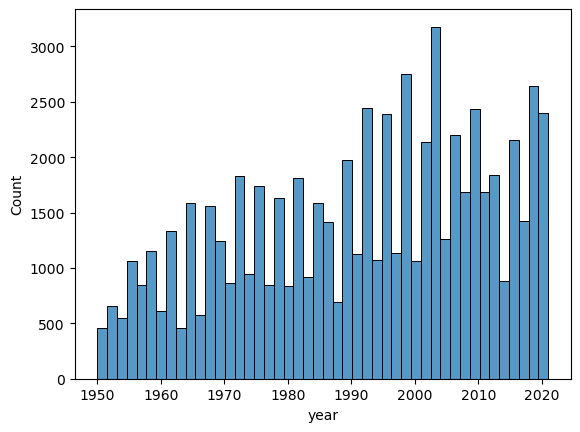

In [41]:
# A categorical plot to assess the number of tornadoes over the years

sns.histplot(df['year'])

The categorical plot shows a general incline in the number of tornadoes from 1950 to 2021

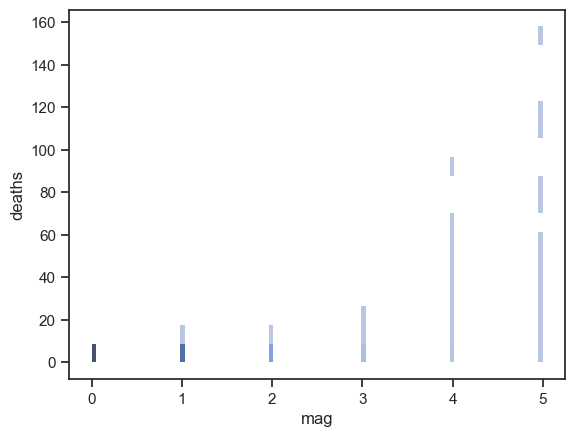

In [43]:
# A categorical plot to show the relationship between magnitude and deaths

h = sns.histplot(x = 'mag', y = 'deaths', data = df)

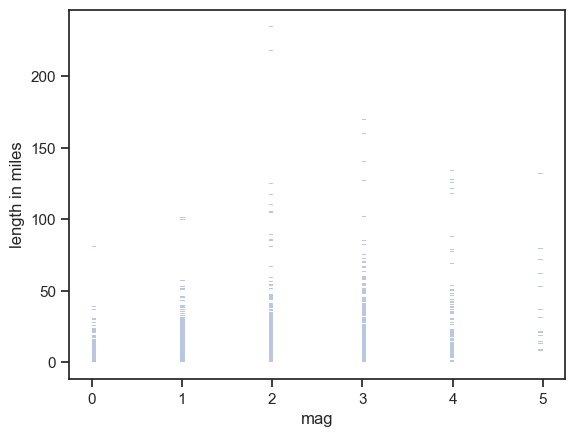

In [44]:
# A categorical plot to show the relationship between magnitude and length

h = sns.histplot(x = 'mag', y = 'length in miles', data = df)

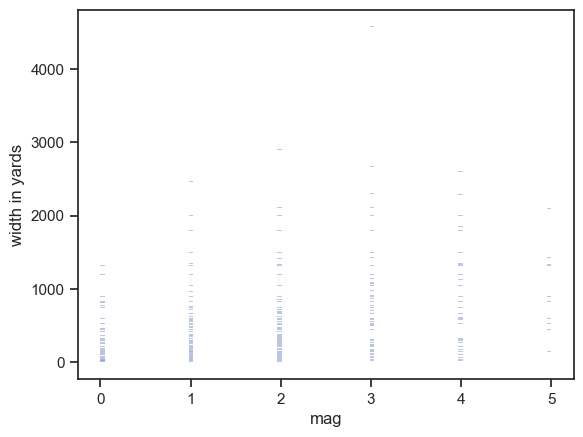

In [45]:
# A categorical plot to show the relationship between magnitude and width

h = sns.histplot(x = 'mag', y = 'width in yards', data = df)

## EDA questions

#### How have the number of tornadoes changed across the years?
- Number of tornadoes has gradually increased across the years since 1950.

#### What year did the most tornadoes occur?
- 2004